# Chapter 1
I've demonstrated level 3 for regression in this chapter.

**Regression Level 3**
<br>
Can fit and explain nonlinear regression

## Regression Level 3

In [33]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Loading data
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Exploring more about the data
housing.shape

(20640, 10)

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:>

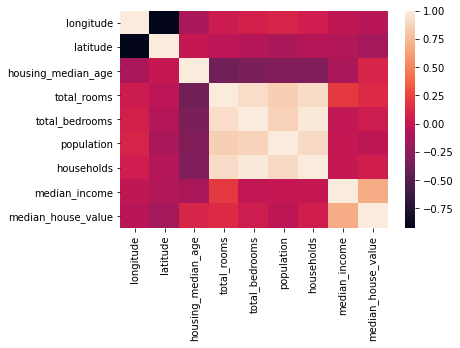

In [5]:
# Looking at correlation between variables
cor = housing.corr()
sns.heatmap(cor)

For linear regression analysis, I will be taking a look at the most correlated variable for our *target variable*, which in this case is **median_house_value**.

The msot correlated variable with our target variable seems to be **median_income**.

In [6]:
# Adjusting our data
housing = housing.drop(["households","total_bedrooms", "housing_median_age", "longitude","latitude","total_rooms","population","ocean_proximity"], axis=1)
housing.head()

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0


In [7]:
# Splitting our data
X = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"]

In [8]:
X

,median_income
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462
...,...
20635,1.5603
20636,2.5568
20637,1.7000
20638,1.8672


In [9]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

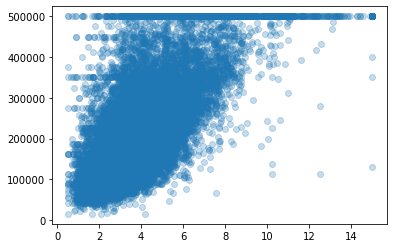

In [10]:
plt.scatter(X, y, cmap = "tab20b", alpha=0.25)

By looking at the above scatterplot, we can infer that  there is a **positive linear relationship** with someone with a hgih income and a more expensive house.

In [11]:
# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predicting values
y_pred = lr.predict(X_test)
y_pred

array([218883.28670631, 287725.25992701, 227210.46727343, ...,
       376342.70106636, 130663.38491348, 241056.67813008])

In [14]:
# Evaluating model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [15]:
r2

0.4564966485656323

In [16]:
rmse

85124.53624841146

In [17]:
lr.coef_

array([42291.41984316])

From this we can see that:
* Our R2 score falls in the range between 0 and 1
* Our RMSE could be lower, but it is good enough for regression purposes
* Our model has a slope (coeff) of 42291.42

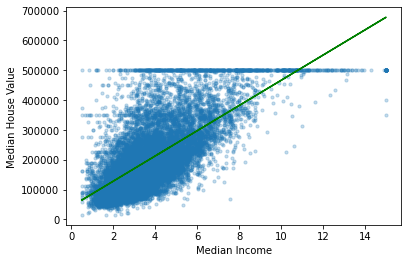

In [18]:
# Visualization of our model
plt.scatter(X_train, y_train, s=10, alpha=0.25)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
# Plotting predictions
plt.plot(X_test, y_pred, color='g')
plt.show()

We can see if the data has any non-linear characteristics by visualizing the data with a **residual plot**. According to seaborn documentation, the **residplot()** function can be a useful tool for checking whether the simple regression model is appropriate for a dataset.

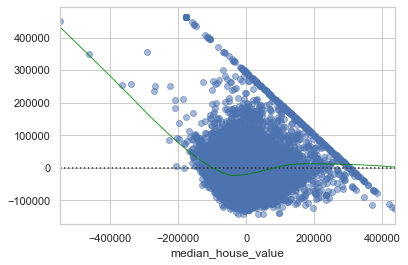

In [31]:
# Identifying if the data is non-linear
sns.set_theme(style="whitegrid")
residual = y_test - y_pred
sns.residplot(x=residual, y=y_pred, scatter_kws={'alpha': 0.5}, lowess=True, line_kws={'color': 'green', 'lw': 1, 'alpha': 0.8})
plt.show()

The residual line (green) is clearly not straight, which means that a linear model may not be the best fit for our data. In this case, I will try to fit a **polynomial regression model** for our data. Polynomial Regression is defined as a form of regression analysis in which the relationship between the independent variable **x** and the dependent variable **y** are modelled as an nth degree polynomial in **x**.

In [35]:
# Fitting the model
poly_reg = PolynomialFeatures()
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression()

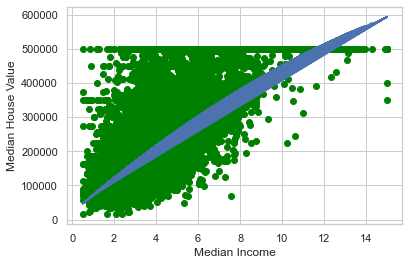

In [37]:
plt.scatter(X_train, y_train, color="green")
plt.plot(X_train, pol_reg.predict(poly_reg.fit_transform(X_train)))
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

In [38]:
# Predicting values
X_poly = poly_reg.fit_transform(X_test)
y_pred_2 = pol_reg.predict(X_poly)

In [39]:
# Evaluating the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred_2))
r2 = r2_score(y_test, y_pred_2)

In [40]:
r2

0.4628233152699195

In [41]:
rmse

84627.63864727618

By using this new model, our R2 score increased from **0.4564966485656323** with the Linear Regression model, to **0.4628233152699195** with the Polynomial Regression model.